# **Makine Öğrenmesi (Machine learning)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.linear_model import LinearRegression   # aşağıda import ediyoruz, Toplu durması için.
# from sklearn.model_selection import train_test_split    # aşağıda import ettik.
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

$$ y=b1x + b0 $$

$$
b1= \frac {\sum_{i = 1}^{n}{(\ x_i - \bar{x})(\ y_i - \bar{y})}}   {\sum_{i = 1}^{n}{(x_i - \bar{x})^2}}
$$

$$ b0= \bar{y} - b1\bar{x} $$

In [ ]:
x = np.array([34, 35, 39, 42, 43, 47])
y = np.array([102, 109, 137, 148, 150, 158])

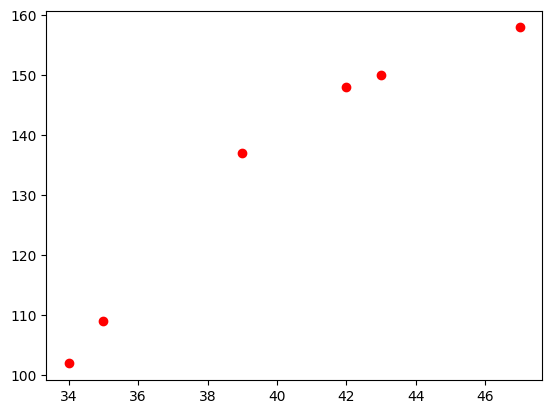

In [ ]:
plt.plot(x,y, "or")

In [ ]:
x_ortalama = x.mean()
x_ortalama

40.0

In [ ]:
y_ortalama = y.mean()
y_ortalama

134.0

In [ ]:
x_ort_fark = x - x_ortalama
x_ort_fark

array([-6., -5., -1.,  2.,  3.,  7.])

In [ ]:
y_ort_fark = y - y_ortalama
y_ort_fark

array([-32., -25.,   3.,  14.,  16.,  24.])

In [ ]:
fark_carpim = x_ort_fark * y_ort_fark
fark_carpim

array([192., 125.,  -3.,  28.,  48., 168.])

In [ ]:
fark_carpim_toplam = fark_carpim.sum()
fark_carpim_toplam

558.0

In [ ]:
x_farkin_karesi = np.power(x_ort_fark, 2)
x_farkin_karesi

array([36., 25.,  1.,  4.,  9., 49.])

In [ ]:
x_farkin_karesi_toplami = x_farkin_karesi.sum()
x_farkin_karesi_toplami

124.0

In [ ]:
b1 = fark_carpim_toplam / x_farkin_karesi_toplami
b1

4.5

In [ ]:
b0 = y_ortalama - 4.5 * x_ortalama
b0

-46.0

#### y = 4.5x - 46

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x.shape

(6,)

In [ ]:
x = x.reshape(-1, 1)

In [ ]:
x.shape

(6, 1)

In [ ]:
x

array([[34],
       [35],
       [39],
       [42],
       [43],
       [47]])

In [ ]:
y = y.reshape(-1, 1)
y.shape

(6, 1)

In [ ]:
reg = LinearRegression()
model = reg.fit(x, y)

In [ ]:
print(model.intercept_)
print(model.coef_)

[-46.]
[[4.5]]


In [ ]:
y2 = model.coef_ * x + model.intercept_

In [ ]:
y2

array([[107. ],
       [111.5],
       [129.5],
       [143. ],
       [147.5],
       [165.5]])

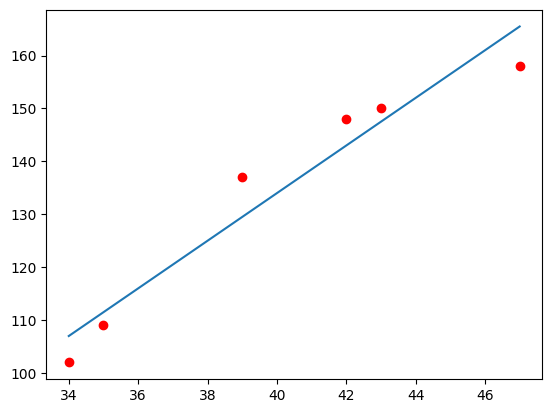

In [ ]:
plt.plot(x, y, "or")
plt.plot(x, y2)

### Veri setlerine geçiş

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/zaferdemirkol/HerkesIcinYapayZeka/main/Advertising.csv")

In [ ]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]

In [ ]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


<Axes: xlabel='total_spend', ylabel='sales'>

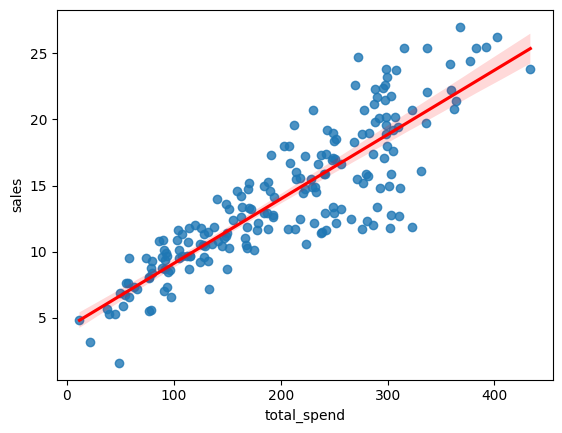

In [ ]:
sns.regplot(data=df, x="total_spend", y="sales", line_kws={"color": "red"})

In [ ]:
X = df["total_spend"]
y = df["sales"]

In [ ]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

In [ ]:
harcama_noktalari = np.linspace(0, 500, 100)

In [ ]:
satis_tahmini = 0.04868788 * harcama_noktalari + 4.24302822

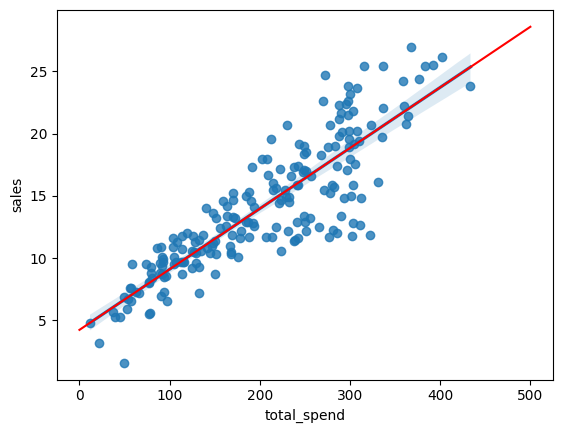

In [ ]:
sns.regplot(data=df, x="total_spend", y="sales")
plt.plot(harcama_noktalari, satis_tahmini, color="red")

In [ ]:
harcama = 200
satis_tahmini = 0.4868788 * harcama + 4.24302822
satis_tahmini

101.61878822

In [ ]:
np.polyfit(X, y, 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [ ]:
pot_harcama = np.linspace(0, 500, 100)
pot_harcama

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [ ]:
satis_tahmini = 3.07615033e-07 * pot_harcama**3 + -1.89392449e-04 * pot_harcama**2 + 8.20886302e-02 * pot_harcama + 2.70495053e+00

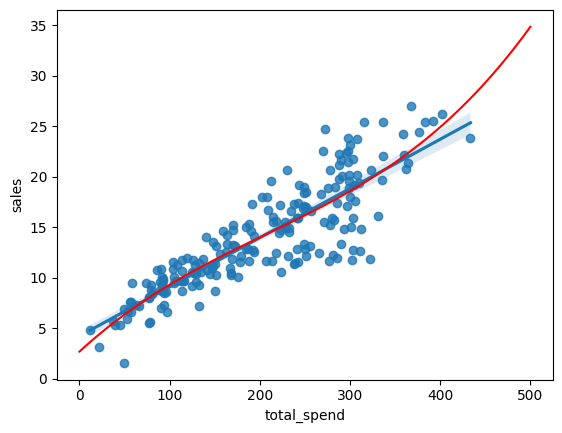

In [ ]:
sns.regplot(data=df, x="total_spend", y="sales")
plt.plot(pot_harcama, satis_tahmini, color="red")

# Lineer Değerlendirme

In [ ]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


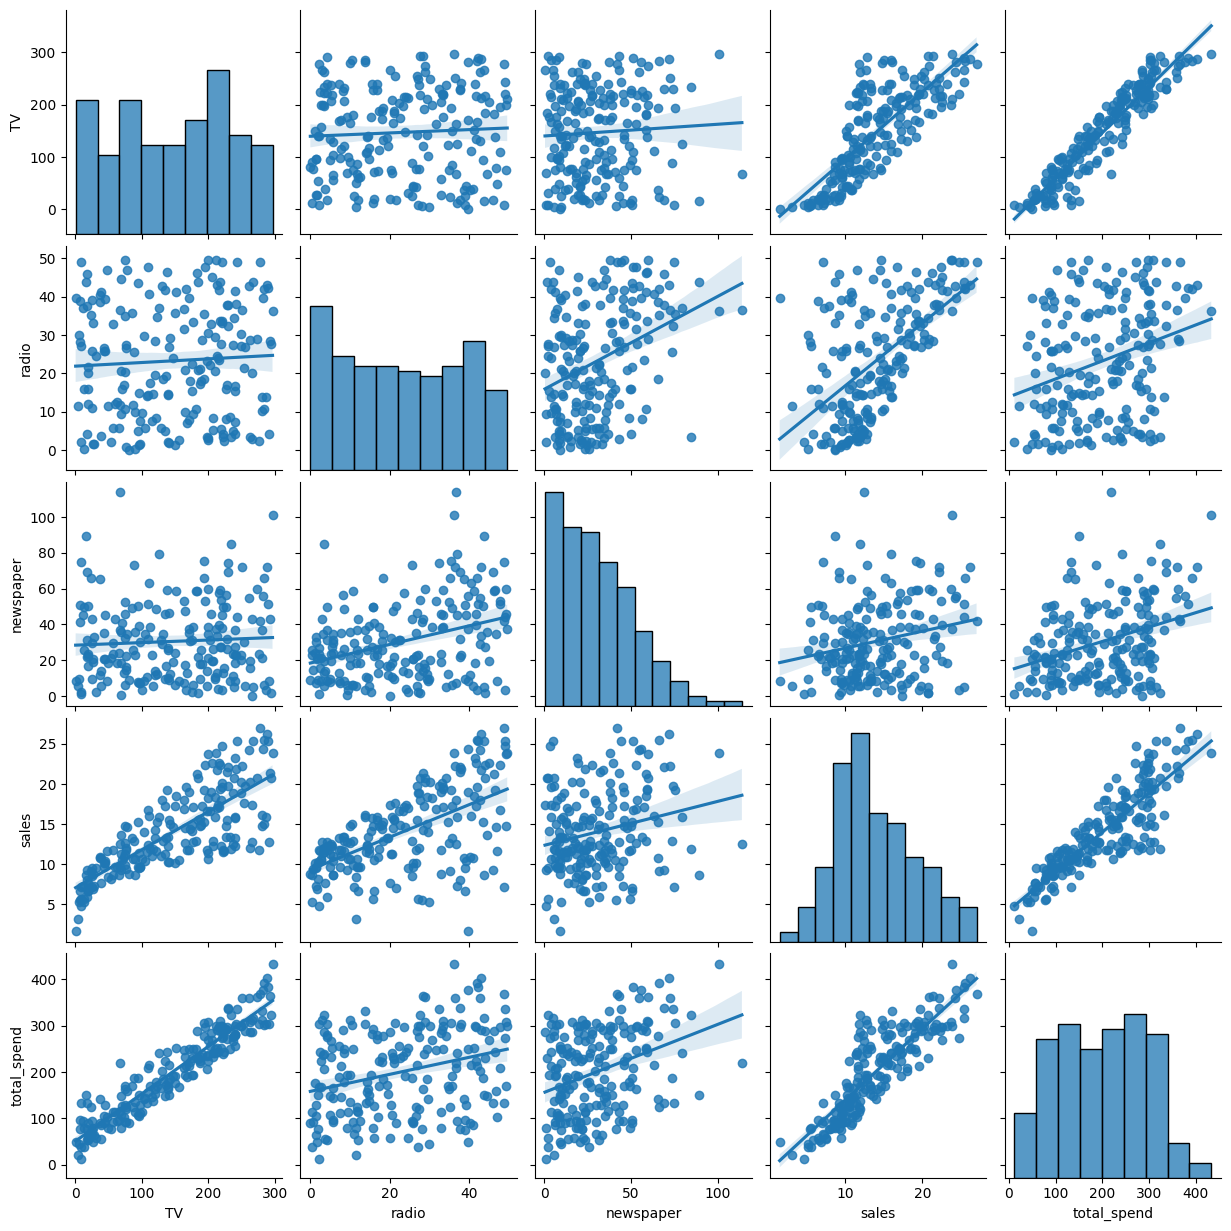

In [ ]:
sns.pairplot(df, kind="reg")

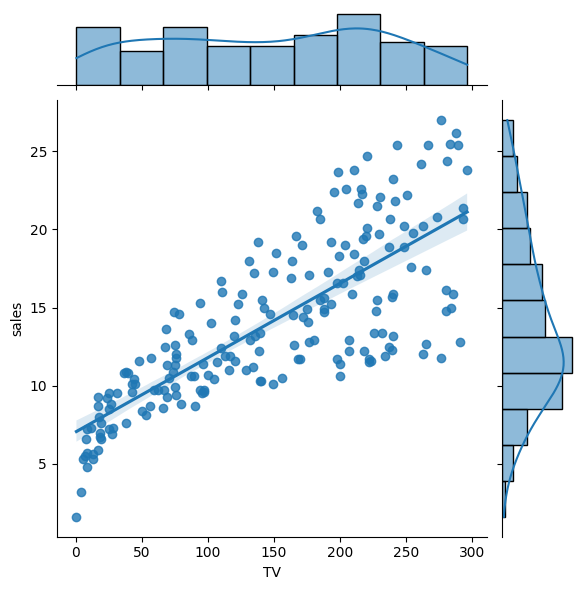

In [ ]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg")

In [ ]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

In [ ]:
model.intercept_

7.032593549127695

In [ ]:
model.coef_

array([0.04753664])

In [ ]:
model.score(X, y)

0.611875050850071

####  R-Kare = 1 - (SSR / SST)

In [ ]:
# R-Kare = 1 - (SSR / SST)

In [ ]:
y_tahmin = model.predict(X)

In [ ]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [ ]:
7.03 + 30 * 0.04

8.23

In [ ]:
yeni_veri = [[30], [90], [200]]
model.predict(yeni_veri)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 8.45869276, 11.31089119, 16.53992164])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
MAE = mean_absolute_error(y, y_tahmin)
MSE = mean_squared_error(y, y_tahmin)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

2.549806038927486

In [ ]:
MSE

10.512652915656757

In [ ]:
RMSE

3.2423221486546887

In [ ]:
gercek_vs_tahmin = pd.DataFrame({"y": y,
                                 "y_tahmin": model.predict(X)})

In [ ]:
gercek_vs_tahmin

,y,y_tahmin
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
...,...,...
195,7.6,8.848493
196,9.7,11.510545
197,12.8,15.446579
198,25.5,20.513985


In [ ]:
gercek_vs_tahmin["hata"] = gercek_vs_tahmin["y"] - gercek_vs_tahmin["y_tahmin"]

In [ ]:
gercek_vs_tahmin

,y,y_tahmin,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
...,...,...,...
195,7.6,8.848493,-1.248493
196,9.7,11.510545,-1.810545
197,12.8,15.446579,-2.646579
198,25.5,20.513985,4.986015


In [ ]:
gercek_vs_tahmin["hata_kare"] = gercek_vs_tahmin["hata"]**2

In [ ]:
gercek_vs_tahmin

,y,y_tahmin,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
...,...,...,...,...
195,7.6,8.848493,-1.248493,1.558735
196,9.7,11.510545,-1.810545,3.278073
197,12.8,15.446579,-2.646579,7.004380
198,25.5,20.513985,4.986015,24.860348


In [ ]:
hata_kare_toplam = gercek_vs_tahmin["hata_kare"].sum()
hata_kare_toplam

2102.5305831313512

In [ ]:
mse = np.mean(gercek_vs_tahmin["hata_kare"])

In [ ]:
mse

10.512652915656757

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse

3.2423221486546887

In [ ]:
# R-kare = 1 - (SSR / SST)    formül

In [ ]:
gercek_deger_ortalamasi = np.mean(y)

In [ ]:
gercek_deger_ortalamasi

14.0225

In [ ]:
gercek_deger_ortalamasindan_sapma = y - gercek_deger_ortalamasi

In [ ]:
gercek_deger_ortalamasindan_sapma

0       8.0775
1      -3.6225
2      -4.7225
3       4.4775
4      -1.1225
        ...   
195    -6.4225
196    -4.3225
197    -1.2225
198    11.4775
199    -0.6225
Name: sales, Length: 200, dtype: float64

In [ ]:
SST = gercek_deger_ortalamasindan_sapma ** 2

In [ ]:
1 - (hata_kare_toplam / SST.sum())

0.611875050850071

<Axes: xlabel='hata', ylabel='Density'>

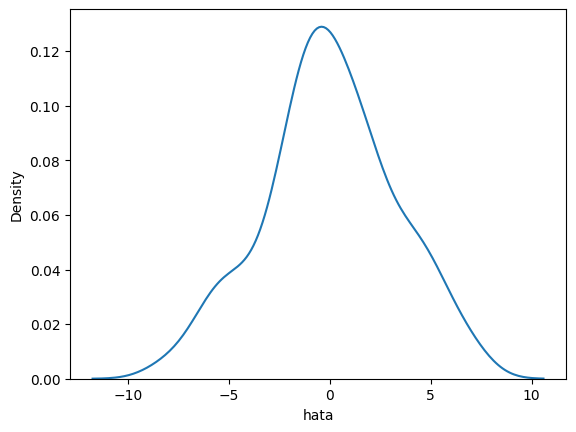

In [ ]:
sns.kdeplot(gercek_vs_tahmin["hata"])

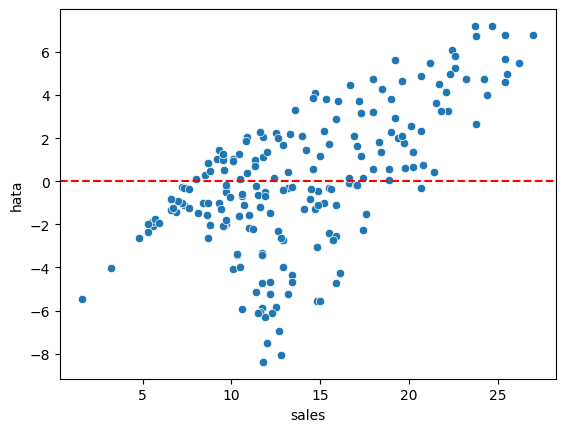

In [ ]:
sns.scatterplot(data=df, x=y, y=gercek_vs_tahmin["hata"])
plt.axhline(y=0, color='r', linestyle='--')

In [ ]:
X = df[["TV"]]
y = df['sales']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
y_test.shape

(60,)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
test_predictions

array([10.69106932, 19.1914961 , 12.48806048, 12.34223136,  8.65886989,
        8.08966588, 19.53490017, 17.21574666, 13.77700179, 17.5497424 ,
        8.96464064, 15.44227632, 17.63912154, 16.53364268, 16.28902608,
        9.27981971, 19.5443085 , 11.67894404,  9.52914048, 17.9025548 ,
        8.09907421, 15.23529304, 20.20289165, 19.46904186, 10.42293189,
       16.57598017, 20.98848727,  9.98074035, 14.96715562,  7.98617424,
        8.29664916, 17.51681324, 13.49475187,  7.79800763, 15.50343047,
       11.74950652, 11.27908999, 11.60838156,  7.72744515, 14.54378074,
       10.36648191, 13.73936846, 11.70246487,  8.06144089, 10.77104013,
       10.43234022,  7.43108273, 17.86492147, 15.68218875, 16.36899689,
        9.27041138, 16.90997591, 20.35812911, 12.69033959, 16.57598017,
        7.36992858, 19.73247512,  9.03520312, 19.67132097, 15.41405133])

In [ ]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

2.5480925983786147

### Pazar Devam

In [ ]:
# df = pd.read_csv("https://raw.githubusercontent.com/zaferdemirkol/HerkesIcinYapayZeka/main/Advertising.csv")    # veri setiyle çalışmaya devam.
df = pd.read_csv("https://raw.githubusercontent.com/zaferdemirkol/HerkesIcinYapayZeka/main/Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


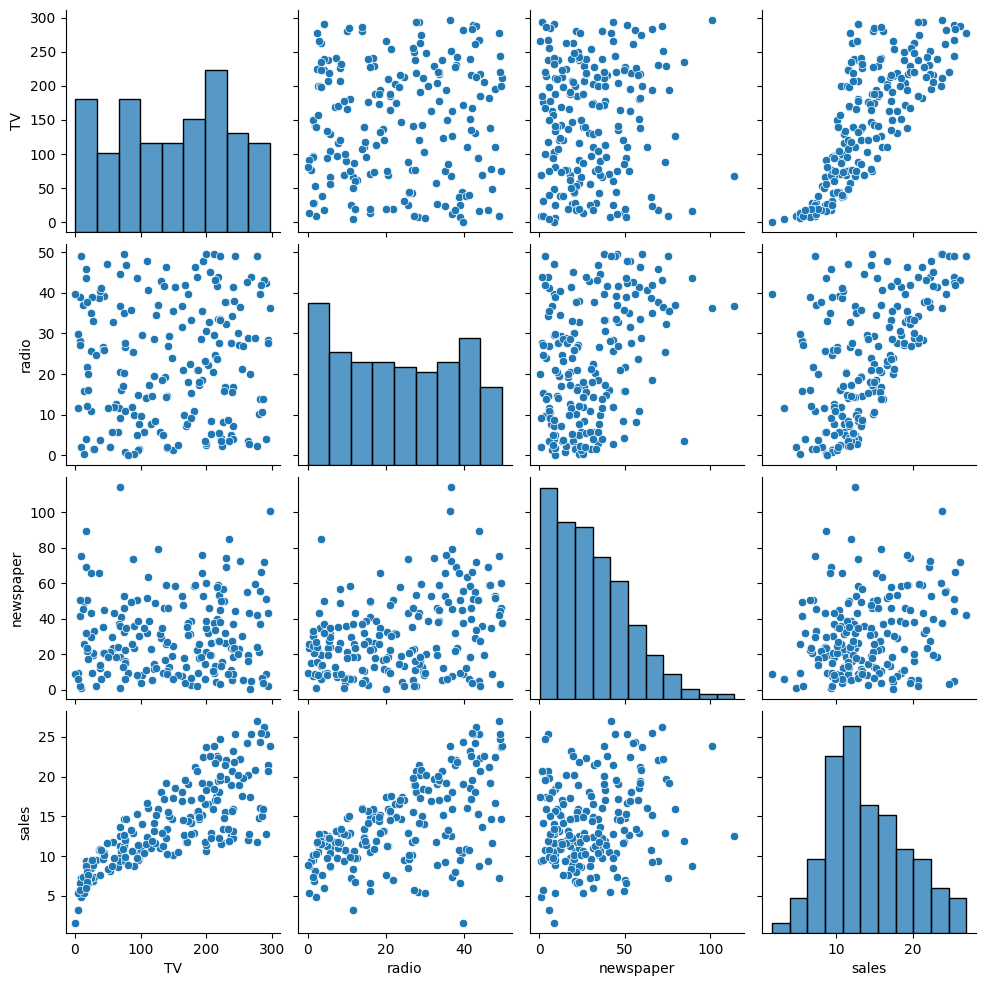

In [ ]:
sns.pairplot(df)

In [ ]:
X = df.drop('sales', axis=1)
y = df['sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)   # eksik tamamlanacak.


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) karesi alınmış hataların ortalamasıdır:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE), karesi alınmış hataların ortalamasının karekökü:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

0.9185780903322445

In [ ]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

1.213745773614481

In [ ]:
MSE

2.2987166978863796

In [ ]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

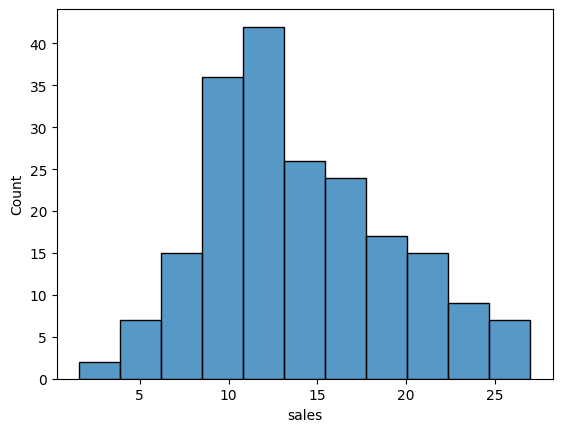

In [ ]:
sns.histplot(data=df, x='sales')

In [ ]:
# x,y
# 10.0,8.04
# 8.0,6.95
# 13.0,7.58
# 9.0,8.81
# 11.0,8.33
# 14.0,9.96
# 6.0,7.24
# 4.0,4.26
# 12.0,10.84
# 7.0,4.82
# 5.0,5.68

In [ ]:
data1 = [
    {'x': 10.0, 'y': 8.04},
    {'x': 8.0, 'y': 6.95},
    {'x': 13.0, 'y': 7.58},
    {'x': 9.0, 'y': 8.81},
    {'x': 11.0, 'y': 8.33},
    {'x': 14.0, 'y': 9.96},
    {'x': 6.0, 'y': 7.24},
    {'x': 4.0, 'y': 4.26},
    {'x': 12.0, 'y': 10.84},
    {'x': 7.0, 'y': 4.82},
    {'x': 5.0, 'y': 5.68},
]

# Verileri pandas DataFrame'ine dönüştürün
df1 = pd.DataFrame(data1)

# DataFrame'i .csv dosyasına kaydedin
df1.to_csv('anscombes_quartet1.csv', index=False)

In [ ]:
quartet = pd.read_csv('anscombes_quartet1.csv')
quartet

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


In [ ]:

def model_olustur(x,y):
		model_quartet1 = LinearRegression()
		X_q1=x
		y_q1=y
		model_quartet1.fit(X_q1, y_q1)
		print(model_quartet1.coef_)
		print(model_quartet1.intercept_)
		MAE = mean_absolute_error(y_q1,model_quartet1.predict(X_q1))
		MSE = mean_squared_error(y_q1,model_quartet1.predict(X_q1))
		print(MAE)
		print(MSE)

In [ ]:
model_olustur(quartet[["x"]], quartet["y"])

[0.50009091]
3.0000909090909094
0.837404958677686
1.2511536363636366


In [ ]:
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

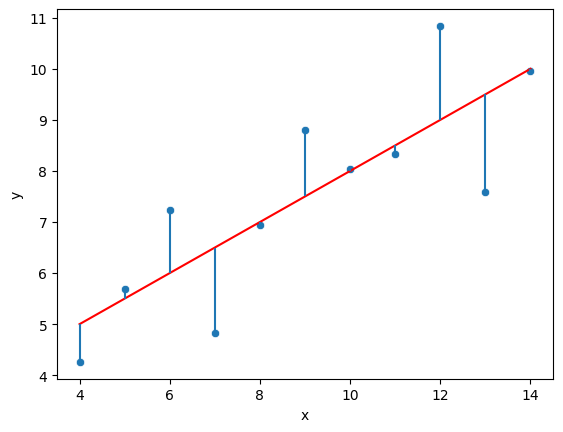

In [ ]:
sns.scatterplot(data=quartet, x='x', y='y')
sns.lineplot(data=quartet, x='x', y='pred_y', color='red')
plt.vlines(quartet['x'], quartet['y'], quartet['y'] - quartet['residual'])

<Axes: xlabel='residual', ylabel='Density'>

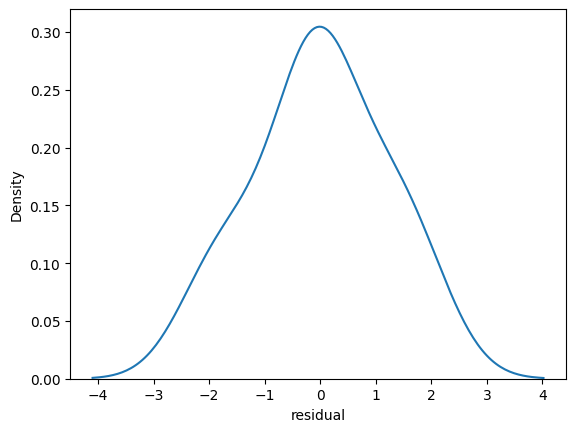

In [ ]:
sns.kdeplot(quartet['residual'])

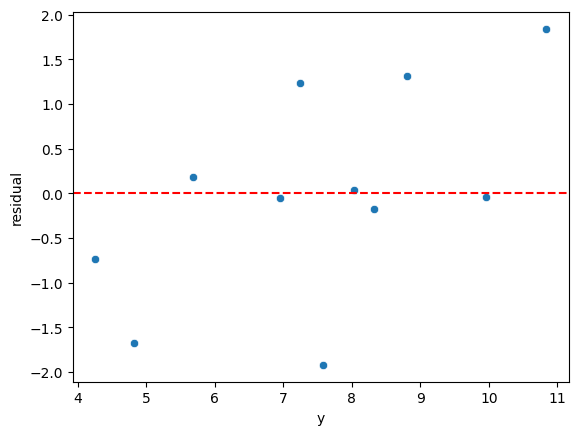

In [ ]:
sns.scatterplot(data=quartet, x='y', y='residual')
plt.axhline(y=0, color='r', linestyle='--')

In [ ]:
# Verilerin listesini oluşturun
data2 = [
    {'x': 10.0, 'y': 9.14},
    {'x': 8.0, 'y': 8.14},
    {'x': 13.0, 'y': 8.74},
    {'x': 9.0, 'y': 8.77},
    {'x': 11.0, 'y': 9.26},
    {'x': 14.0, 'y': 8.1},
    {'x': 6.0, 'y': 6.13},
    {'x': 4.0, 'y': 3.1},
    {'x': 12.0, 'y': 9.13},
    {'x': 7.0, 'y': 7.26},
    {'x': 5.0, 'y': 4.74},
]

# Verileri pandas DataFrame'ine dönüştürün
df2 = pd.DataFrame(data2)

# DataFrame'i .csv dosyasına kaydedin
df2.to_csv('anscombes_quartet2.csv', index=False)

In [ ]:
quartet = pd.read_csv('anscombes_quartet2.csv')

In [ ]:
model_olustur(quartet[["x"]], quartet["y"])

[0.5]
3.00090909090909
0.9679338842975209
1.2523900826446281


In [ ]:
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

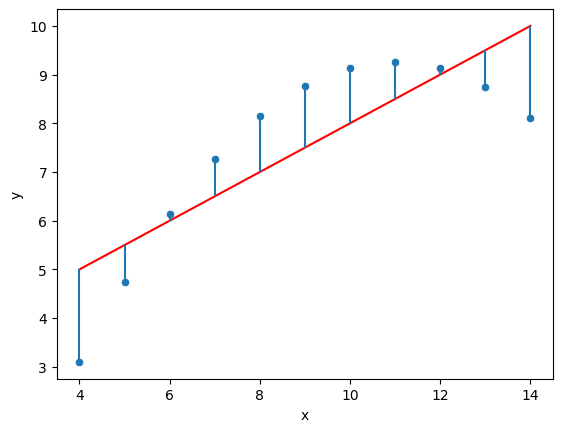

In [ ]:
sns.scatterplot(data=quartet, x='x', y='y')
sns.lineplot(data=quartet, x='x', y='pred_y', color='red')
plt.vlines(quartet['x'], quartet['y'], quartet['y'] - quartet['residual'])

<Axes: xlabel='residual', ylabel='Density'>

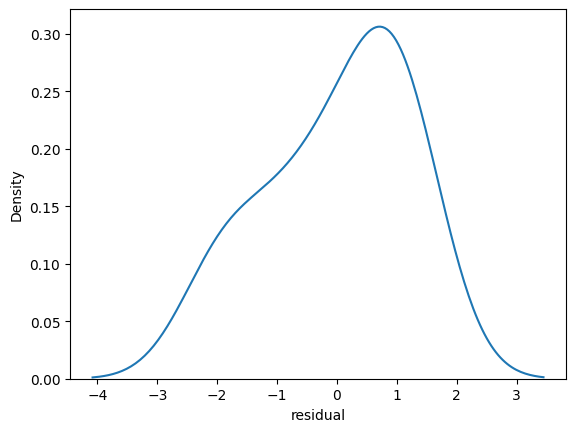

In [ ]:
sns.kdeplot(quartet['residual'])

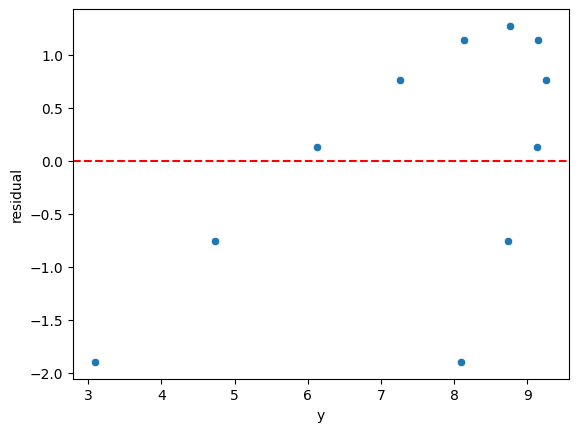

In [ ]:
sns.scatterplot(data=quartet, x='y', y='residual')
plt.axhline(y=0, color='r', linestyle='--')

In [ ]:
data4 = [
    {'x': 8.0, 'y': 6.58},
    {'x': 8.0, 'y': 5.76},
    {'x': 8.0, 'y': 7.71},
    {'x': 8.0, 'y': 8.84},
    {'x': 8.0, 'y': 8.47},
    {'x': 8.0, 'y': 7.04},
    {'x': 8.0, 'y': 5.25},
    {'x': 19.0, 'y': 12.5},
    {'x': 8.0, 'y': 5.56},
    {'x': 8.0, 'y': 7.91},
    {'x': 8.0, 'y': 6.89},
]

# Verileri pandas DataFrame'ine dönüştürme
df4 = pd.DataFrame(data4)

# DataFrame'i .csv dosyasına kaydetmek için
df4.to_csv('anscombes_quartet4.csv', index=False)

In [ ]:
quartet = pd.read_csv('anscombes_quartet4.csv')

In [ ]:
model_olustur(quartet[["x"]], quartet["y"])

[0.49990909]
3.0017272727272726
0.902727272727273
1.249317272727273


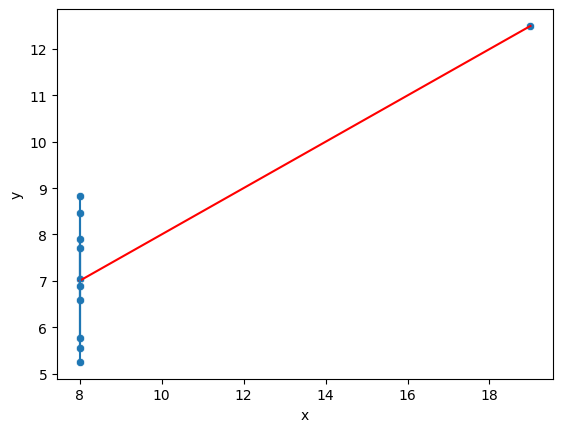

In [ ]:
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

<Axes: xlabel='residual', ylabel='Density'>

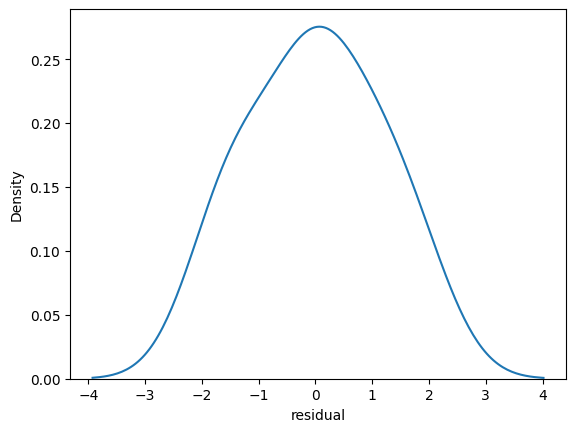

In [ ]:
sns.kdeplot(quartet['residual'])

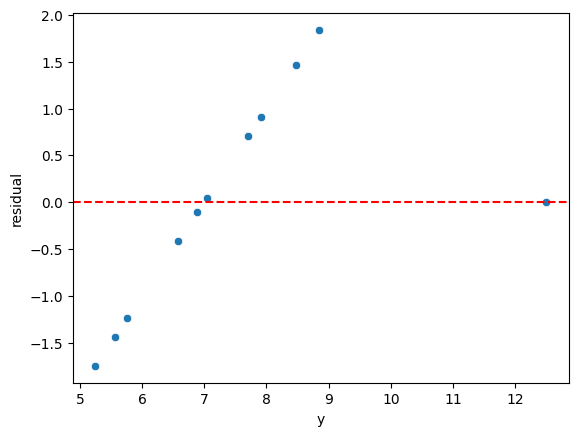

In [ ]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
test_res = y_test - test_predictions

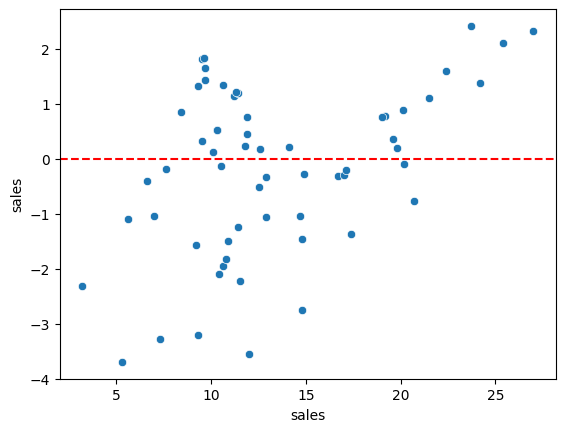

In [ ]:
sns.scatterplot(x=y_test, y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

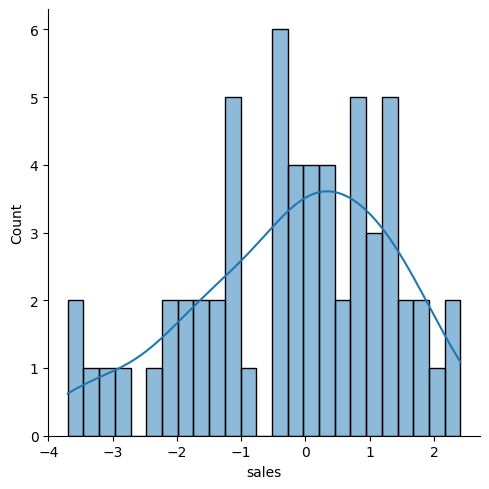

In [ ]:
sns.displot(test_res, bins=25, kde=True)

In [ ]:
final_model = LinearRegression()

In [ ]:
final_model.fit(X,y)

LinearRegression()

In [ ]:
y_hat = final_model.predict(X)

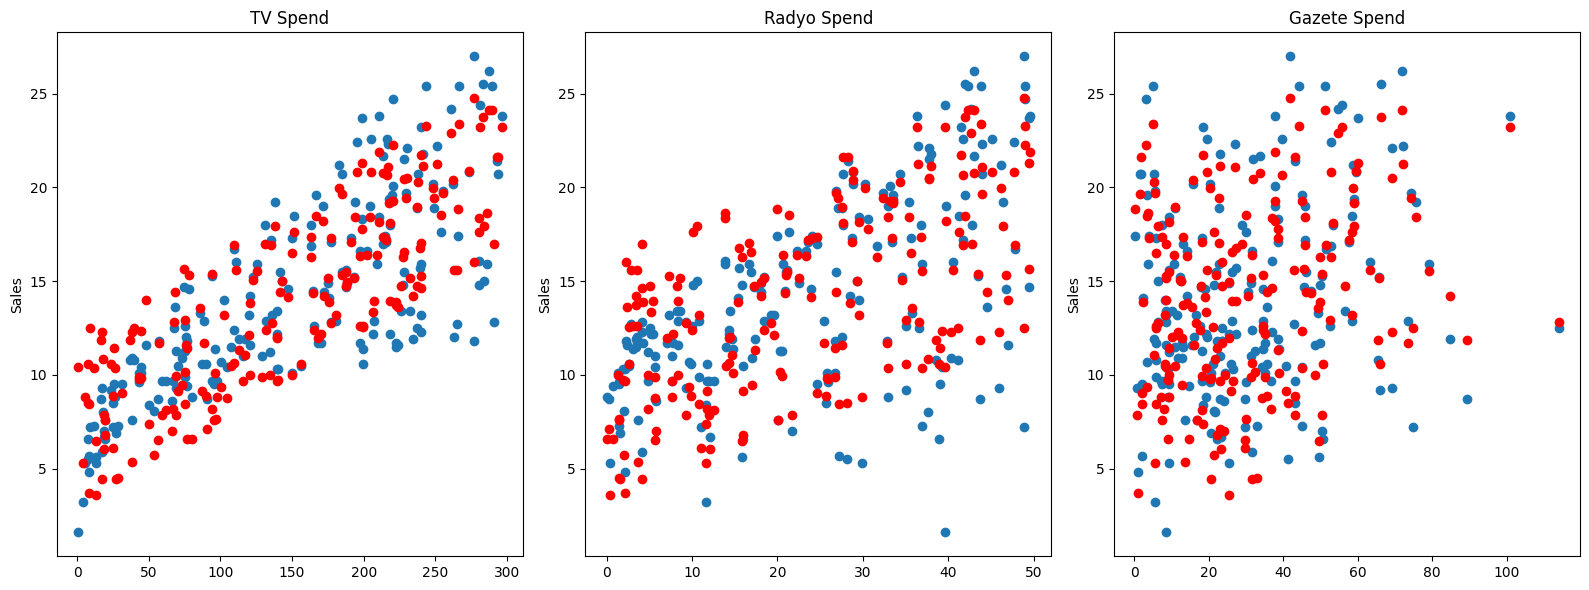

In [ ]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color='red')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radyo Spend")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o', color='red')
axes[2].set_ylabel("Sales")
axes[2].set_title("Gazete Spend")
plt.tight_layout()

In [ ]:
residuals = y_hat - y

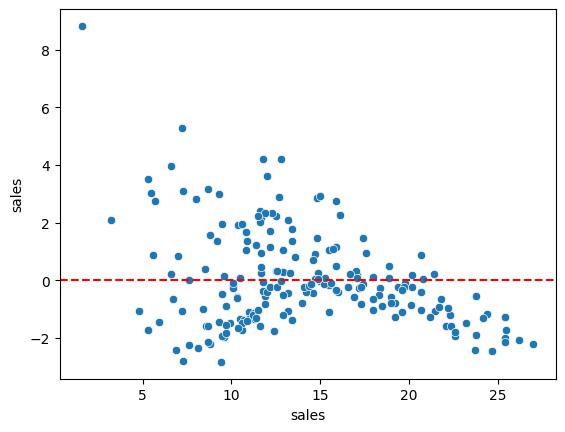

In [ ]:
sns.scatterplot(x=y, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

In [ ]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
coeff_df = pd.DataFrame(final_model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [ ]:
# y = ax1 + bx2 + bx3 + d     # yukarıdaki çarpamlar.
                              # Her 1000 birimlik alışverişte, 45 adet TV satışı bekleniyor.
                              # Her 1000 birimlik alışverişte, 188 Radio
                              # Her 1000 birimlik alışverişte, - newspaper. yani modele katkısı yok.


In [ ]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
final_model.predict([[149, 22, 12]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

In [ ]:
final_model.predict([[1000,1000,1000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([236.1960587])

In [ ]:
from joblib import dump, load

In [ ]:
dump(final_model, 'sales_model.joblib')      # modeli kaydetmek için

['sales_model.joblib']

In [ ]:
loaded_model = load('sales_model.joblib')   # Kayıtlı Modeli yüklemek yani kullanmak için.

In [ ]:
loaded_model.predict([[149, 22, 12]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

## Polynom regresyon

In [ ]:
data = [
    {'gün': 1, 'harcama': 105.20248325776834},
    {'gün': 1, 'harcama': 100.09228449117114},
    {'gün': 1, 'harcama': 101.3344533016872},
    {'gün': 1, 'harcama': 105.32225257430298},
    {'gün': 2, 'harcama': 107.02851631090567},
    {'gün': 2, 'harcama': 82.02772063575455},
    {'gün': 2, 'harcama': 112.24498172501188},
    {'gün': 3, 'harcama': 109.30869068376472},
    {'gün': 3, 'harcama': 94.16281330775138},
    {'gün': 3, 'harcama': 124.39438169834467},
    {'gün': 3, 'harcama': 93.9331784778272},
    {'gün': 4, 'harcama': 87.8116997531164},
    {'gün': 4, 'harcama': 116.8240302553422},
    {'gün': 4, 'harcama': 101.69367048194837},
    {'gün': 5, 'harcama': 106.8930520704841},
    {'gün': 5, 'harcama': 122.24033244260455},
    {'gün': 5, 'harcama': 101.70767075872355},
    {'gün': 5, 'harcama': 116.25914335956672},
    {'gün': 6, 'harcama': 113.88611783035887},
    {'gün': 6, 'harcama': 111.34678084088617},
    {'gün': 6, 'harcama': 125.17733448886484},
    {'gün': 7, 'harcama': 123.72625352975273},
    {'gün': 7, 'harcama': 138.48967596399285},
    {'gün': 7, 'harcama': 133.0788088444653},
    {'gün': 8, 'harcama': 130.94964293576214},
    {'gün': 8, 'harcama': 125.93726423560469},
    {'gün': 8, 'harcama': 119.2567959140863},
    {'gün': 8, 'harcama': 142.31582339236417},
    {'gün': 9, 'harcama': 119.79603640847024},
    {'gün': 9, 'harcama': 117.63737811667217},
    {'gün': 9, 'harcama': 126.05248167531413},
    {'gün': 10, 'harcama': 135.01225075289324},
    {'gün': 10, 'harcama': 122.26509950574112},
    {'gün': 10, 'harcama': 110.2659979443961},
    {'gün': 10, 'harcama': 137.3605405138154},
    {'gün': 11, 'harcama': 121.80936672632285},
    {'gün': 11, 'harcama': 140.63290290589305},
    {'gün': 11, 'harcama': 119.53178767718572},
    {'gün': 12, 'harcama': 137.87926911013523},
    {'gün': 12, 'harcama': 132.06556435861594},
    {'gün': 12, 'harcama': 151.88947314253537},
    {'gün': 13, 'harcama': 134.6331836028432},
    {'gün': 13, 'harcama': 156.3471257598966},
    {'gün': 13, 'harcama': 138.5684584708321},
    {'gün': 13, 'harcama': 148.21590837341427},
    {'gün': 14, 'harcama': 144.7803567607732},
    {'gün': 14, 'harcama': 176.4512776125703},
    {'gün': 14, 'harcama': 157.4047486104757},
    {'gün': 15, 'harcama': 159.4158524291693},
    {'gün': 15, 'harcama': 163.28154353186372},
    {'gün': 15, 'harcama': 163.53438256845195},
    {'gün': 15, 'harcama': 157.16165397048934},
    {'gün': 16, 'harcama': 137.7580396256262},
    {'gün': 16, 'harcama': 166.5935064477792},
    {'gün': 16, 'harcama': 183.854045111633},
    {'gün': 17, 'harcama': 158.55178337533874},
    {'gün': 17, 'harcama': 184.2767858666634},
    {'gün': 17, 'harcama': 148.24078900860292},
    {'gün': 17, 'harcama': 156.62720270275054},
    {'gün': 18, 'harcama': 166.014039590514},
    {'gün': 18, 'harcama': 180.40815392537039},
    {'gün': 18, 'harcama': 176.05597103451765},
    {'gün': 19, 'harcama': 178.47135563775066},
    {'gün': 19, 'harcama': 179.60433819445387},
    {'gün': 19, 'harcama': 180.8766813788938},
    {'gün': 20, 'harcama': 186.52911288119498},
    {'gün': 20, 'harcama': 170.80406641689046},
    {'gün': 20, 'harcama': 170.60506431028665},
    {'gün': 20, 'harcama': 180.59208345238068},
    {'gün': 21, 'harcama': 180.50669097779138},
    {'gün': 21, 'harcama': 210.00603081680669},
    {'gün': 21, 'harcama': 197.0749649496795},
    {'gün': 22, 'harcama': 185.228785892576},
    {'gün': 22, 'harcama': 188.251459324537},
    {'gün': 22, 'harcama': 178.35837775479825},
    {'gün': 22, 'harcama': 214.89445724705453},
    {'gün': 23, 'harcama': 193.72807922846573},
    {'gün': 23, 'harcama': 203.18292193126334},
    {'gün': 23, 'harcama': 213.1562498108215},
    {'gün': 24, 'harcama': 207.08229083342536},
    {'gün': 24, 'harcama': 220.65615419454295},
    {'gün': 24, 'harcama': 207.33231999185105},
    {'gün': 25, 'harcama': 207.92950820774075},
    {'gün': 25, 'harcama': 206.20376272565818},
    {'gün': 25, 'harcama': 236.2535916278076},
    {'gün': 25, 'harcama': 223.89334917091884},
    {'gün': 26, 'harcama': 206.53586991171844},
    {'gün': 26, 'harcama': 216.25153699637514},
    {'gün': 26, 'harcama': 225.37212221420629},
    {'gün': 27, 'harcama': 213.91313593590684},
    {'gün': 27, 'harcama': 240.92468989708487},
    {'gün': 27, 'harcama': 195.64385607039478},
    {'gün': 27, 'harcama': 244.83890999123398},
    {'gün': 28, 'harcama': 231.93711508107015},
    {'gün': 28, 'harcama': 246.21287918242237},
    {'gün': 28, 'harcama': 244.71852539219813},
    {'gün': 29, 'harcama': 244.30073110751573},
    {'gün': 29, 'harcama': 240.6801634285065},
    {'gün': 29, 'harcama': 245.12395139909475},
    {'gün': 30, 'harcama': 261.94944872976305}
]


df = pd.DataFrame(data)

df.to_csv('masraflar.csv', index=False)

In [ ]:
veriler = pd.read_csv("masraflar.csv")
veriler

,gün,harcama
0,1,105.202483
1,1,100.092284
2,1,101.334453
3,1,105.322253
4,2,107.028516
...,...,...
95,28,244.718525
96,29,244.300731
97,29,240.680163
98,29,245.123951


In [ ]:
x = veriler["gün"]
y = veriler["harcama"]

In [ ]:
coefficients = np.polyfit(x, y, 2)
polynomial = np.poly1d(coefficients)

In [ ]:
y_pred = polynomial(x)

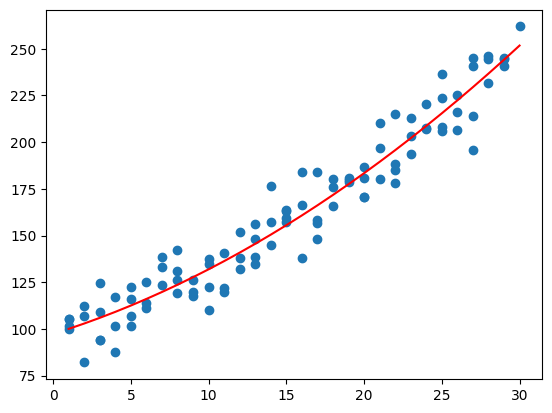

In [ ]:
plt.scatter(x, y, label='Gerçek Veriler')
plt.plot(x, y_pred, color='r', label='2. Dereeden Polinom')

In [ ]:
gun = veriler.iloc[:,0:1]

In [ ]:
Harcama = veriler.iloc[:,1:2]

In [ ]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
LModel = linReg.fit(gun, Harcama)

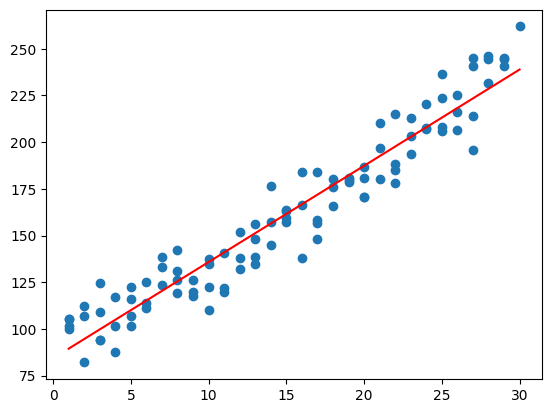

In [ ]:
plt.scatter(gun, Harcama)
plt.plot(gun, LModel.predict(gun), color="red")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
LModel.score(gun, Harcama)

0.9230686703268497

In [ ]:
MAE = mean_absolute_error(y, LModel.predict(gun))
print(MAE)
MSE = mean_squared_error(y, LModel.predict(gun))
print(MSE)
RMSE = np.sqrt(MSE)
print(RMSE)

10.355467888640376
158.40064446527427
12.585731781079488


In [ ]:
from sklearn.preprocessing  import PolynomialFeatures
polReg = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
Harcama.mean()

harcama    161.626434
dtype: float64

In [ ]:
gun_pol = polReg.fit_transform(gun)

In [ ]:
gun_pol.shape

(100, 2)

In [ ]:
gun_pol

array([[  1.,   1.],
       [  1.,   1.],
       [  1.,   1.],
       [  1.,   1.],
       [  2.,   4.],
       [  2.,   4.],
       [  2.,   4.],
       [  3.,   9.],
       [  3.,   9.],
       [  3.,   9.],
       [  3.,   9.],
       [  4.,  16.],
       [  4.,  16.],
       [  4.,  16.],
       [  5.,  25.],
       [  5.,  25.],
       [  5.,  25.],
       [  5.,  25.],
       [  6.,  36.],
       [  6.,  36.],
       [  6.,  36.],
       [  7.,  49.],
       [  7.,  49.],
       [  7.,  49.],
       [  8.,  64.],
       [  8.,  64.],
       [  8.,  64.],
       [  8.,  64.],
       [  9.,  81.],
       [  9.,  81.],
       [  9.,  81.],
       [ 10., 100.],
       [ 10., 100.],
       [ 10., 100.],
       [ 10., 100.],
       [ 11., 121.],
       [ 11., 121.],
       [ 11., 121.],
       [ 12., 144.],
       [ 12., 144.],
       [ 12., 144.],
       [ 13., 169.],
       [ 13., 169.],
       [ 13., 169.],
       [ 13., 169.],
       [ 14., 196.],
       [ 14., 196.],
       [ 14.,

In [ ]:
gun

,gün
0,1
1,1
2,1
3,1
4,2
...,...
95,28
96,29
97,29
98,29


In [ ]:
linReg2 = LinearRegression()

linReg2.fit(gun_pol, Harcama)

LinearRegression()

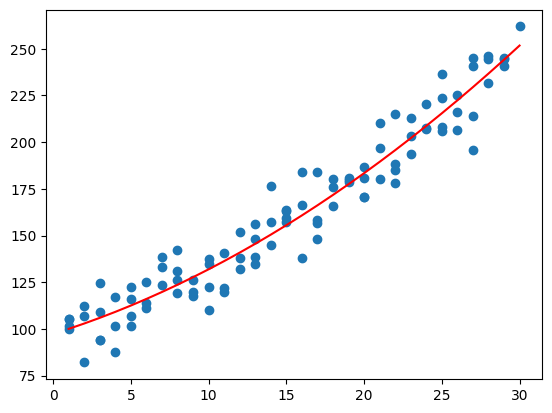

In [ ]:
plt.scatter(gun, Harcama)
plt.plot(gun, linReg2.predict(gun_pol), color="red")

In [ ]:
linReg2.score(gun_pol, Harcama)

0.9372742300738232

In [ ]:
MAE = mean_absolute_error(y, linReg2.predict(gun_pol))
print(MAE)

MSE = mean_squared_error(y, linReg2.predict(gun_pol))
print(MSE)

RMSE = np.sqrt(MSE)
print(RMSE)

9.248393806066822
129.15157482783772
11.364487442372301
